# 범주형 데이터 십분위로 나누기

- quantile 함수를 이용하면 해당 컬럼의 십분위 값을 알 수 있습니다.
- 반복문으로 해당 행을 분위값으로 분류합니다.

In [97]:
# 데이터 불러오기
df = pd.read_csv('datas/order_items.csv')
df = df.reset_index()[['index','price']][:30000]

df.tail()
# index = 주문 번호
# price = 주문 금액

,index,price
29995,29995,34.99
29996,29996,39.00
29997,29997,1200.00
29998,29998,749.90
29999,29999,198.90


<AxesSubplot:ylabel='price'>

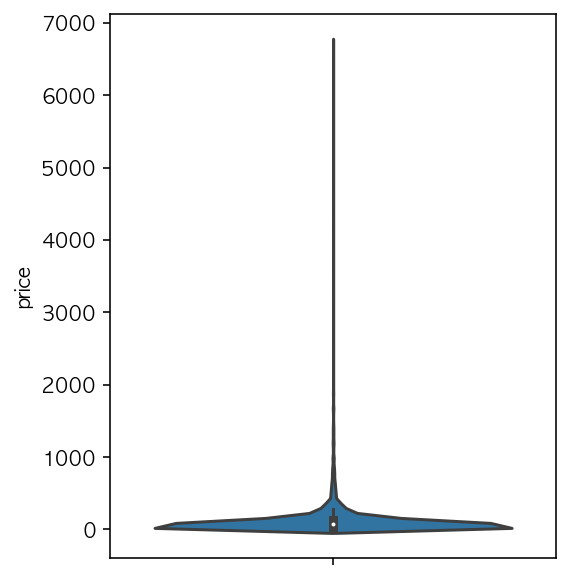

In [108]:
# 데이터는 이런 분포로 되어있습니다.
plt.figure(figsize = (4,5))
sns.violinplot(data = df, y = 'price')

## quantile 함수
- quantile 함수를 쓰면 해당 수치형 데이터의 분위 수 값을 계산할 수 있습니다.
- 시리즈.quantile(q = 분위수/전체)

In [99]:
# 100분위 수 15
print(df['price'].quantile(q= 15/100))
# 10분위수 5
print(df['price'].quantile(q= 5/10))
# 10분위 수 10
print(df['price'].quantile(q= 10/10))


29.0
74.9
6735.0


## 분위수 분류하기
- 첫번째 반복문은 10~1역순으로 진행됩니다.
    - 몇분위수 값을 계산하여, qi에 할당합니다.
- 두번째 반복문에서 행별로 돌아가며, 분위값 분류를 진행합니다.

In [102]:
# 10에서 1까지 역순으로 반복
for i in range(10,0,-1):
    # qi = 얼마
    globals()[f'q{i}'] = df['price'].quantile(q = i/10)
    # 얼마까지 몇분위인지 출력
    print(f'q{i}:  ~ ' + str(round(globals()[f'q{i}'])))
    # df의 행마다 돌아가며 반복, qi값보다 작으면 'qi' 할당
    for j in df.index:
        # qi값보다 작으면, 'quantile'칼럼 값에 'qi' 할당
        if df.loc[j, 'price'] <= globals()[f'q{i}']:
            df.loc[j, 'quantile'] = f'q{i}'

q10:  ~ 6735
q9:  ~ 229
q8:  ~ 151
q7:  ~ 120
q6:  ~ 95
q5:  ~ 75
q4:  ~ 59
q3:  ~ 47
q2:  ~ 35
q1:  ~ 24


In [105]:
# 십분위 분류가 잘 되었는지 미리보기
df.head()

,index,price,quantile
0,0,58.90,q4
1,1,239.90,q10
2,2,199.00,q9
3,3,12.99,q1
4,4,199.90,q9


<AxesSubplot:xlabel='quantile', ylabel='count'>

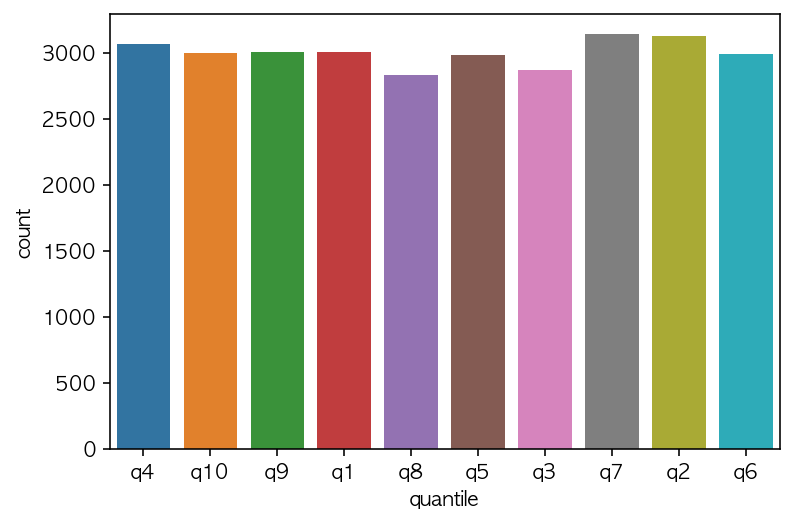

In [104]:
# 비슷한 가격대의 주문건이 많아서 총 집계 수량이 차이납니다.
# 겹치는 수치가 적은 데이터의 경우 거의 비슷하게 나옵니다.
sns.countplot(df['quantile'])